- remove texts in other languages
- remove texts with less than 50 tokens
- html code to unicode
- remove numbers and punctuation
- remove emails
- remove stopwords
- normalization/lowercasing
- lemmatization
- tokenization

#Import libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import random
random.seed(123)

In [ ]:
!pip install langdetect

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=89aab965f83499295d4f0097dc635bdedbc4b0db14344a7e68acff488229c4d1
  Stored in directory: /root/.cache/pip/wheels/13/c7/b0/79f66658626032e78fc1a83103690ef6797d551cb22e56e734
Successfully built langdetect


In [ ]:
!pip install -U spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 42.9 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.4.4
    Uninstalling spacy-3.4.4:
      Successfully uninstalled spacy-3.4.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.4.1 requires spacy<3.5.0,>=3.4.0, but you have spacy 3.5.0 which is incompatible.


In [ ]:
!python -m spacy download pt_core_news_md

/usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
2023-03-06 22:50:03.424558: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-06 22:50:04.708637: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-06 22:50:04.708791: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open share

In [1]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords')
import seaborn as sns
import matplotlib.pyplot as plt
import spacy
from spacy import displacy
from collections import Counter
from spacy.tokens import Span
import glob
import os
import json
import re
from nltk.tokenize import word_tokenize
import numpy as np
from langdetect import detect
from PIL import Image
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\beatr\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\beatr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
spacy.load('pt_core_news_md')

In [ ]:
data = pd.read_csv('D:\\MS DATA SCIENCE\\NLP TESE\\data\\data.csv')

In [5]:
len(data)

34908

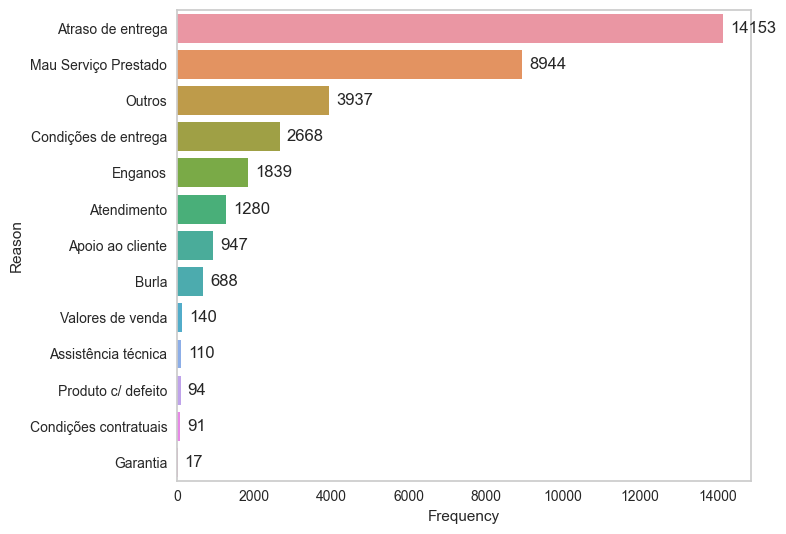

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the countplot horizontally
ax = sns.countplot(y=data["reason"], order=data["reason"].value_counts().index)
ax.set_xlabel("Frequency")
ax.set_ylabel("Reason")

# Set y-axis labels rotation and alignment
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, ha="right")

# Add frequency labels on top of each bar
total = len(data["reason"])  # Total count of data points
for p in ax.patches:
    width = p.get_width()
    ax.annotate(f'{int(width)}',  # Absolute frequency
                (width, p.get_y() + p.get_height() / 2.),  # Positioning
                ha='left', va='center', xytext=(5, 0),  # Text alignment and offset
                textcoords='offset points')

# Sort the y-axis labels by decreasing frequency
ordered_labels = data["reason"].value_counts().sort_values(ascending=False).index
ax.set_yticklabels(ordered_labels)

# Remove the vertical grid lines
ax.grid(False)

# Adjust the plot layout and display the plot
plt.tight_layout()
plt.show()


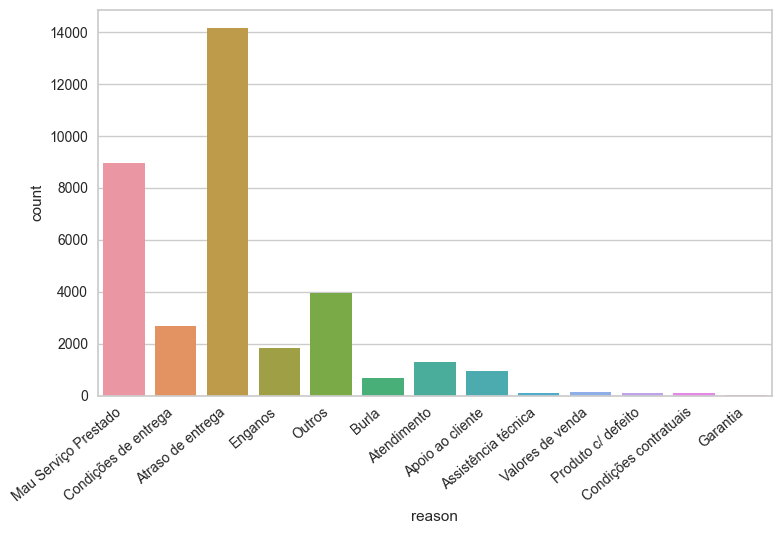

In [8]:
ax=sns.countplot(x=data["reason"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

# remove texts in other languages

In [ ]:
outros=0
pt=0
indices_outros=[]
    
for i in range(0, len(data)):
    item=data.iloc[i]['description'].lower()
    item=clean_data(item)
    item=HTMLEntitiesToUnicode(item)
    if detect(item.lower())=='pt':
        pt+=1
    else:
        outros+=1
        indices_outros+=[i]

In [ ]:
indices_outros

[74,
 190,
 435,
 761,
 926,
 1034,
 1110,
 1300,
 1554,
 1597,
 1666,
 1788,
 1804,
 1839,
 2058,
 2084,
 3069,
 3229,
 3378,
 3411,
 3429,
 3508,
 3535,
 3850,
 3990,
 4119,
 4298,
 4727,
 4937,
 5227,
 5234,
 5717,
 5922,
 6584,
 6714,
 6807,
 7289,
 7402,
 7516,
 7817,
 7893,
 7900,
 7959,
 8006,
 8025,
 8056,
 8106,
 8161,
 8336,
 8407,
 8792,
 8862,
 8968,
 9404,
 9451,
 9634,
 9658,
 10192,
 10306,
 10770,
 10810,
 11093,
 11279,
 11294,
 11453,
 11678,
 11694,
 11790,
 11923,
 12082,
 12226,
 12397,
 12475,
 12519,
 12593,
 12625,
 12636,
 12752,
 12806,
 12828,
 13001,
 13121,
 13127,
 13227,
 13495,
 13695,
 13833,
 14003,
 14005,
 14370,
 14421,
 14465,
 14657,
 14983,
 15375,
 15608,
 15662,
 16092,
 16208,
 16262,
 16449,
 16652,
 16733,
 16761,
 16855,
 16936,
 17119,
 17282,
 17360,
 17783,
 17856,
 17897,
 17969,
 18258,
 18495,
 18700,
 19031,
 19044,
 19177,
 19208,
 19245,
 19251,
 19345,
 19386,
 19468,
 19623,
 19707,
 19835,
 19958,
 20370,
 20693,
 21225,
 21246,

In [ ]:
len(indices_outros)

206

In [ ]:
for item in indices_outros:
    print(data['description'].iloc[item])
    print('*******************')

AGUARDO A ENTREGA DA SEGUINTE ENCOMENDA INTERNACIONAL
Item # : 232161591629
Transaction id : 1418509029013

*******************
This is the THIRD package that has went through this ridiculousness. NOBODY has EVER CONTACTED ME..., EVER - by email or phone. I have had to go and practically BEG the CTT employees to help. THEY ARE HORRIBLE. ALL WRONG ANSWERS... COMPLETE misdirections... 
I had to bring a friend in who YELLED AT THEM and finally received the correct information. A COMPLETE SHOCK to see that... after all my visits all I had to do was YELL AT SOMEONE to get the straight answer? WHAT IS GOING ON HERE?
*******************
No dia 13/06 fiz uma compra de baixo valor que foi enviada via serviço enconómico. Fazendo o seguimento do tracking, o artigo já foi desalfandegado e a partir de 24/06 não há movimento. O artigo está na posse dos CTT e, após contacto em balcão dos CTT fui informado que não têm o numero em sistema portanto evidencia que não têm este artigo.
Envio informação com

In [ ]:
data.drop(data.index[indices_outros], axis=0, inplace=True)

In [ ]:
len(data)

34702

# remove texts with less than 50 tokens

In [ ]:
idx=[]
for i in range(len(data)):
    tokens = nltk.word_tokenize(data['description'].iloc[i])
    if len(tokens) <= 50:
        idx+=[i]

In [ ]:
idx

[10,
 11,
 18,
 19,
 24,
 25,
 37,
 46,
 50,
 52,
 55,
 57,
 67,
 69,
 71,
 75,
 76,
 86,
 87,
 93,
 115,
 129,
 135,
 136,
 142,
 151,
 165,
 166,
 168,
 182,
 183,
 187,
 192,
 198,
 212,
 226,
 231,
 233,
 236,
 241,
 251,
 253,
 256,
 258,
 271,
 272,
 274,
 275,
 277,
 278,
 293,
 304,
 307,
 319,
 328,
 338,
 342,
 344,
 346,
 347,
 352,
 356,
 365,
 366,
 369,
 375,
 376,
 379,
 381,
 389,
 394,
 395,
 399,
 401,
 417,
 432,
 442,
 448,
 470,
 476,
 482,
 483,
 493,
 496,
 498,
 515,
 516,
 521,
 530,
 542,
 544,
 549,
 566,
 575,
 580,
 582,
 583,
 590,
 593,
 602,
 604,
 608,
 620,
 641,
 652,
 656,
 659,
 662,
 670,
 677,
 680,
 689,
 691,
 693,
 696,
 700,
 704,
 705,
 708,
 710,
 712,
 717,
 734,
 737,
 741,
 749,
 757,
 766,
 772,
 773,
 785,
 787,
 789,
 792,
 795,
 799,
 810,
 812,
 813,
 820,
 822,
 823,
 828,
 829,
 833,
 839,
 843,
 845,
 847,
 848,
 855,
 875,
 877,
 879,
 893,
 895,
 910,
 911,
 920,
 923,
 929,
 933,
 934,
 937,
 938,
 944,
 959,
 960,
 964,
 969,


In [ ]:
len(idx)

6267

In [ ]:
data.drop(data.index[idx], axis=0, inplace=True)

In [ ]:
len(data)

28435

# select top complaints

In [ ]:
# select most frequent reasons
new_data = data[data['reason'].str.contains('Mau Serviço Prestado|Condições de entrega|Atraso de entrega|Enganos')]

In [ ]:
new_data['reason'].unique()

array(['Mau Serviço Prestado', 'Condições de entrega',
       'Atraso de entrega', 'Enganos'], dtype=object)

In [ ]:
new_data['reason'].isnull().sum()


0

In [ ]:
len(new_data)

22430

In [ ]:
#save df as csv 
import os
os.makedirs('/content/drive/MyDrive/MS DATA SCIENCE /TESE ', exist_ok=True)  
new_data.to_csv('/content/drive/MyDrive/MS DATA SCIENCE /TESE /data_filtered.csv', header=True)

# data cleaning

In [ ]:
new_data = pd.read_csv('/content/drive/MyDrive/MS DATA SCIENCE /TESE /data_filtered.csv')

In [ ]:
import html
def HTMLEntitiesToUnicode(text):
    string=''
    for item in text.split():
        string=string+html.unescape(item)+' '
    result = string.replace('\xa0', ' ')
    return result

# function to tokenize data and remove stopwords
def process_narrative(narrative):
    stopwords_list = nltk.corpus.stopwords.words('portuguese')
    tokens = nltk.word_tokenize(narrative)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords_list]
    
    # adding line to remove all tokens with numbers and punctuation
    stopwords_punc_and_numbers_removed = [word.lower() for word in stopwords_removed if word.isalpha()]

    return stopwords_punc_and_numbers_removed


# function to concat words (used in function below)
def concat_words(list_of_words):
    # remove any NaN's
    # list_of_words = [i for i in list if i is not np.nan]

    concat_words = ''
    for word in list_of_words:
        concat_words += word + ' '
    return concat_words.strip()


# function to lemmatize words and merge each complaint into a single space-separated string
def make_lemma_and_concat(list_of_words):
    # remove any NaN's
    list_of_words = [i for i in list_of_words if i is not np.nan]
    
    # lemmatize each word
    lemmatized_list = []
    nlp = spacy.load('pt_core_news_md')
    for word in list_of_words:
        doc=nlp(word)
        for token in doc:
            lemmatized_list.append(token.lemma_)    
    
    # make the list into a single string with the words separated by ' '
    concatenated_string = concat_words(lemmatized_list)
    return concatenated_string

In [ ]:
def clean_data(texto): #aplica-se a uma so string
    # Remove new line characters
    texto = texto.replace('\n', ' ')
    texto = texto.replace('\r', ' ')
    # Remove multiple spaces
    texto=re.sub(' +', ' ',texto)
    # Remove Emails
    texto = re.sub('\S*@\S*\s?', '',texto)
    # Remove single quotes
    texto = re.sub("\"", '', texto)
    # Remove hyperlinks
    texto = re.sub('http://\S+|https://\S+', '', texto)
    texto = re.sub('http[s]?://\S+', '', texto)
    texto = re.sub(r"http\S+", '', texto)
    texto = re.sub(r'www.\S+', '', texto)
    # Replaces repetitions of exlamation marks
    texto = re.sub(r"(\!)\1+", '!', texto)
    # Replaces repetitions of question marks
    texto = re.sub(r"(\?)\1+", '?', texto)
    # Replaces repetitions of .
    texto = re.sub(r"(\.)\1+", '.', texto)
    # Replaces repetitions of -
    texto = re.sub(r"(\-)\1+", ' ', texto)
    # Replaces repetitions of ,
    texto = re.sub(r"(\,)\1+", ' ', texto)
    return texto

In [ ]:
for i in range(20496, len(new_data)):
    raw=new_data['description'].iloc[i]
    raw=raw.lower()
    clean= clean_data(raw)
    clean=HTMLEntitiesToUnicode(clean)
    processed_narr = process_narrative(clean)
    narr = make_lemma_and_concat(processed_narr)
    with open(f'/content/drive/MyDrive/MS DATA SCIENCE /TESE /processed/{i}.txt', 'w',encoding='utf-8') as convert_file:
      convert_file.write(json.dumps(narr))
    print(f'Finished line number {i}')

Finished line number 20496
Finished line number 20497
Finished line number 20498
Finished line number 20499
Finished line number 20500
Finished line number 20501
Finished line number 20502
Finished line number 20503
Finished line number 20504
Finished line number 20505
Finished line number 20506
Finished line number 20507
Finished line number 20508
Finished line number 20509
Finished line number 20510
Finished line number 20511
Finished line number 20512
Finished line number 20513
Finished line number 20514
Finished line number 20515
Finished line number 20516
Finished line number 20517
Finished line number 20518
Finished line number 20519
Finished line number 20520
Finished line number 20521
Finished line number 20522
Finished line number 20523
Finished line number 20524
Finished line number 20525
Finished line number 20526
Finished line number 20527
Finished line number 20528
Finished line number 20529
Finished line number 20530
Finished line number 20531
Finished line number 20532
F

In [ ]:
#para ler o output
outputs=[]
for i in range(len(new_data)):
  with open(f'/content/drive/MyDrive/MS DATA SCIENCE /TESE /processed/{i}.txt', 'r',encoding='utf-8') as fd:
    output=json.load(fd)
    outputs.append(output)

new_data['narrative_tfidf']=outputs

# Process data for embeddings

# script by the authors of the embeddings  
https://github.com/nathanshartmann/portuguese_word_embeddings/blob/master/preprocessing.py

In [ ]:
"""
Script used for cleaning corpus in order to train word embeddings.
All emails are mapped to a EMAIL token.
All numbers are mapped to 0 token.
All urls are mapped to URL token.
Different quotes are standardized.
Different hiphen are standardized.
HTML strings are removed.
All text between brackets are removed.
...
"""

from sys import stdout
import argparse
import re
import nltk

sent_tokenizer = nltk.data.load('tokenizers/punkt/portuguese.pickle')

# Punctuation list
punctuations = re.escape('!"#%\'()*+,./:;<=>?@[\\]^_`{|}~')

# ##### #
# Regex #
# ##### #
re_remove_brackets = re.compile(r'\{.*\}')
re_remove_html = re.compile(r'<(\/|\\)?.+?>', re.UNICODE)
re_transform_numbers = re.compile(r'\d', re.UNICODE)
re_transform_emails = re.compile(r'[^\s]+@[^\s]+', re.UNICODE)
re_transform_url = re.compile(r'(http|https)://[^\s]+', re.UNICODE)
# Different quotes are used.
re_quotes_1 = re.compile(r"(?u)(^|\W)[‘’′`']", re.UNICODE)
re_quotes_2 = re.compile(r"(?u)[‘’`′'](\W|$)", re.UNICODE)
re_quotes_3 = re.compile(r'(?u)[‘’`′“”]', re.UNICODE)
re_dots = re.compile(r'(?<!\.)\.\.(?!\.)', re.UNICODE)
re_punctuation = re.compile(r'([,";:]){2},', re.UNICODE)
re_hiphen = re.compile(r' -(?=[^\W\d_])', re.UNICODE)
re_tree_dots = re.compile(u'…', re.UNICODE)
# Differents punctuation patterns are used.
re_punkts = re.compile(r'(\w+)([%s])([ %s])' %
                       (punctuations, punctuations), re.UNICODE)
re_punkts_b = re.compile(r'([ %s])([%s])(\w+)' %
                         (punctuations, punctuations), re.UNICODE)
re_punkts_c = re.compile(r'(\w+)([%s])$' % (punctuations), re.UNICODE)
re_changehyphen = re.compile(u'–')
re_doublequotes_1 = re.compile(r'(\"\")')
re_doublequotes_2 = re.compile(r'(\'\')')
re_trim = re.compile(r' +', re.UNICODE)


def clean_text(text):
    """Apply all regex above to a given string."""
    text = text.lower()
    text = text.replace('\xa0', ' ')
    text = re_tree_dots.sub('...', text)
    text = re.sub('\.\.\.', '', text)
    text = re_remove_brackets.sub('', text)
    text = re_changehyphen.sub('-', text)
    text = re_remove_html.sub(' ', text)
    text = re_transform_numbers.sub('0', text)
    text = re_transform_url.sub('URL', text)
    text = re_transform_emails.sub('EMAIL', text)
    text = re_quotes_1.sub(r'\1"', text)
    text = re_quotes_2.sub(r'"\1', text)
    text = re_quotes_3.sub('"', text)
    text = re.sub('"', '', text)
    text = re_dots.sub('.', text)
    text = re_punctuation.sub(r'\1', text)
    text = re_hiphen.sub(' - ', text)
    text = re_punkts.sub(r'\1 \2 \3', text)
    text = re_punkts_b.sub(r'\1 \2 \3', text)
    text = re_punkts_c.sub(r'\1 \2', text)
    text = re_doublequotes_1.sub('\"', text)
    text = re_doublequotes_2.sub('\'', text)
    text = re_trim.sub(' ', text)
    return text.strip()

In [ ]:
narrative=[]
for i in range(len(new_data)):
    raw=new_data['description'].iloc[i]
    clean= clean_text(raw)
        
    narrative.append(clean)
    if i % 2000 == 0:
        print(f'Finished line number {i}')

new_data['narrative_embeddings'] = narrative

Finished line number 0
Finished line number 2000
Finished line number 4000
Finished line number 6000
Finished line number 8000
Finished line number 10000
Finished line number 12000
Finished line number 14000
Finished line number 16000
Finished line number 18000
Finished line number 20000
Finished line number 22000


# Process text for BERT or other LM

In [ ]:
import html
import re
def HTMLEntitiesToUnicode(text):
    string=''
    for item in text.split():
        string=string+html.unescape(item)+' '
    result = string.replace('\xa0', ' ')
    return result

def clean_data(texto): #aplica-se a uma so string
    # Remove new line characters
    texto = texto.replace('\n', ' ')
    texto = texto.replace('\r', ' ')
    # Remove multiple spaces
    texto=re.sub(' +', ' ',texto)
    # Remove Emails
    texto = re.sub('\S*@\S*\s?', '',texto)
    # Remove single quotes
    texto = re.sub("\"", '', texto)
    # Remove hyperlinks
    texto = re.sub('http://\S+|https://\S+', '', texto)
    texto = re.sub('http[s]?://\S+', '', texto)
    texto = re.sub(r"http\S+", '', texto)
    texto = re.sub(r'www.\S+', '', texto)
    # Replaces repetitions of exlamation marks
    texto = re.sub(r"(\!)\1+", '!', texto)
    # Replaces repetitions of question marks
    texto = re.sub(r"(\?)\1+", '?', texto)
    # Replaces repetitions of .
    texto = re.sub(r"(\.)\1+", '.', texto)
    # Replaces repetitions of -
    texto = re.sub(r"(\-)\1+", ' ', texto)
    # Replaces repetitions of ,
    texto = re.sub(r"(\,)\1+", ' ', texto)
    return texto

In [ ]:
narrative_bert=[]
for i in range(len(new_data)):
    raw=new_data['description'].iloc[i]
    clean= clean_data(raw)
    clean=HTMLEntitiesToUnicode(clean)
    narrative_bert.append(clean)
    if i % 2000 == 0:
        print(f'Finished line number {i}')
new_data['narrative_bert'] = narrative_bert

Finished line number 0
Finished line number 2000
Finished line number 4000
Finished line number 6000
Finished line number 8000
Finished line number 10000
Finished line number 12000
Finished line number 14000
Finished line number 16000
Finished line number 18000
Finished line number 20000
Finished line number 22000


In [ ]:
#save df as csv 
import os
os.makedirs('/content/drive/MyDrive/MS DATA SCIENCE /TESE ', exist_ok=True)  
new_data.to_csv('/content/drive/MyDrive/MS DATA SCIENCE /TESE /data_processed.csv', header=True)